# Lab04: Linear, Polynomial, and Decision Tree Regression
---
111062117 黃祥陞

In this assignment, you need to train regression models on Beijing PM2.5 dataset in winter of 2014.

1. You have to implement
  - a Linear (Polynomial) regressor
  - a Random Forest regressor
2. You need to show a residual plot for each of your model on both training data and testing data.
3. $R^2$ score of at least one model need to be larger than 0.72 on testing data.

## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

In [3]:
df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [5]:
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [7]:
def plot_residuals(y_train, y_train_pred, y_test, y_test_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Testing data')
    plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), color='red', lw=2)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

## Model Training and Evaluation
### Polynomial Regression

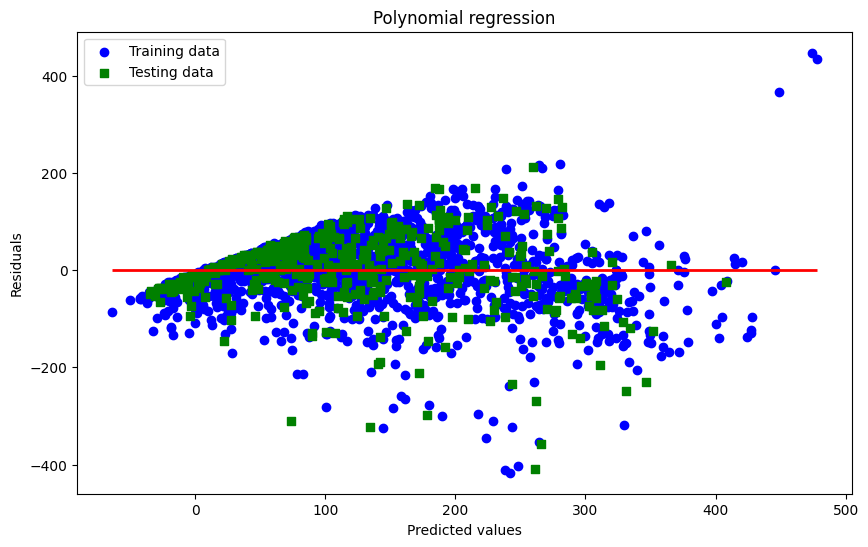

Train MSE: 5534.196260515688
Test MSE: 6010.3590025372905
Train R^2: 0.6471652636129948
Test R^2: 0.6304764442343249


In [8]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_train_pred = lr.predict(X_train_poly)
y_test_pred = lr.predict(X_test_poly)

# plot residuals
plot_residuals(y_train, y_train_pred, y_test, y_test_pred, 'Polynomial regression')

# model evaluation
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

## Random Forest Regressor

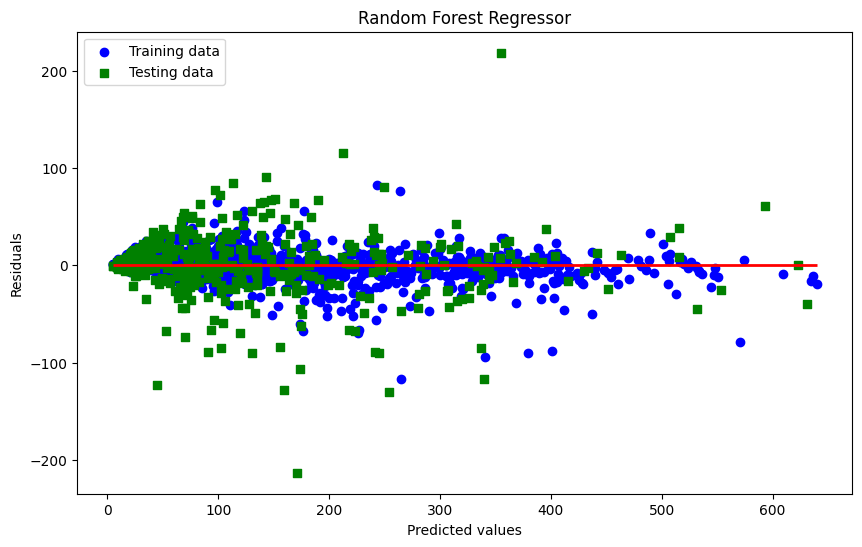

Train MSE: 169.1131774647887
Test MSE: 1162.8315922535212
Train R^2: 0.9892181266110722
Test R^2: 0.9285078204904589


In [9]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# plot residual plots
plot_residuals(y_train, y_train_pred, y_test, y_test_pred, 'Random Forest Regressor')

# model evaluation
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

## Summary

1. **Polynomial Regression**:
    - We used a polynomial regressor with a degree of 2.
    - The model was trained and evaluated, showing residual plots for both training and testing data.
    - Model performance:
      - Train MSE: 5534.196260515688
      - Test MSE: 6010.3590025372905
      - Train R^2: 0.6471652636129948
      - Test R^2: 0.6304764442343249

2. **Random Forest Regressor**:
    - We used a random forest regressor with 100 estimators.
    - The model was trained and evaluated, showing residual plots for both training and testing data.
    - Model performance:
      - Train MSE: 169.1131774647887
      - Test MSE: 1162.8315922535212
      - Train R^2: 0.9892181266110722
      - Test R^2: 0.9285078204904589

At least one model achieved an R^2 score greater than 0.72 on the testing data, meeting the assignment requirement.